    Ano           Distribuidora  Indicador_Qualidade  Indicador_Satisfacao
0  2022             Mux Energia                90.00                 75.69
1  2022  Pacto Energia (Forcel)                88.32                 71.27
2  2022                 Sulgipe                83.73                 69.78
3  2022                Hidropan                81.77                 69.00
4  2022            Cooperaliana                82.99                 67.25
Ano
2006    62.09
2007    66.57
2008    65.39
2009    67.00
2010    67.36
2012    61.79
2013    67.99
2014    70.76
2015    63.47
2016    66.21
2017    68.08
2018    70.65
2019    74.62
2020    76.46
2021    76.29
2022    79.10
Name: Indicador_Qualidade, dtype: float64
Ano
2006    60.69
2007    66.49
2008    63.21
2009    67.15
2010    64.38
2012    62.16
2013    60.90
2014    72.22
2015    62.72
2016    67.66
2017    67.10
2018    69.27
2019    72.29
2020    65.28
2021    58.74
2022    63.12
Name: Indicador_Satisfacao, dtype: float64


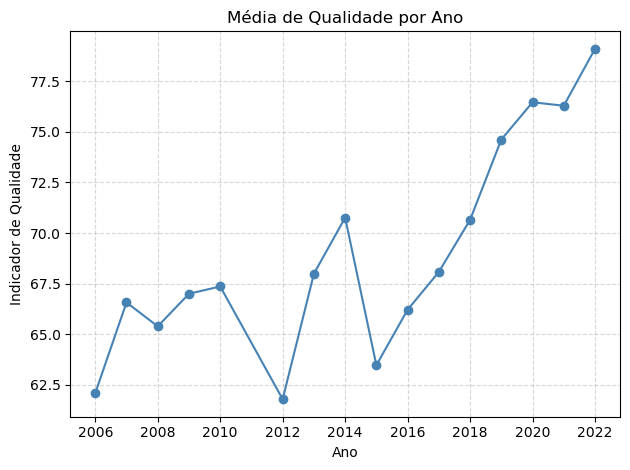

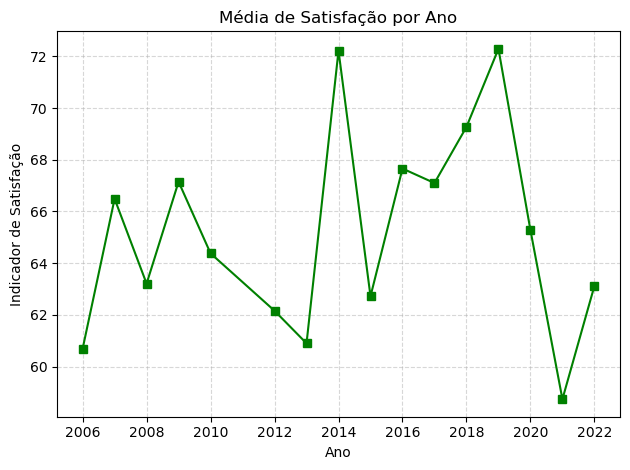

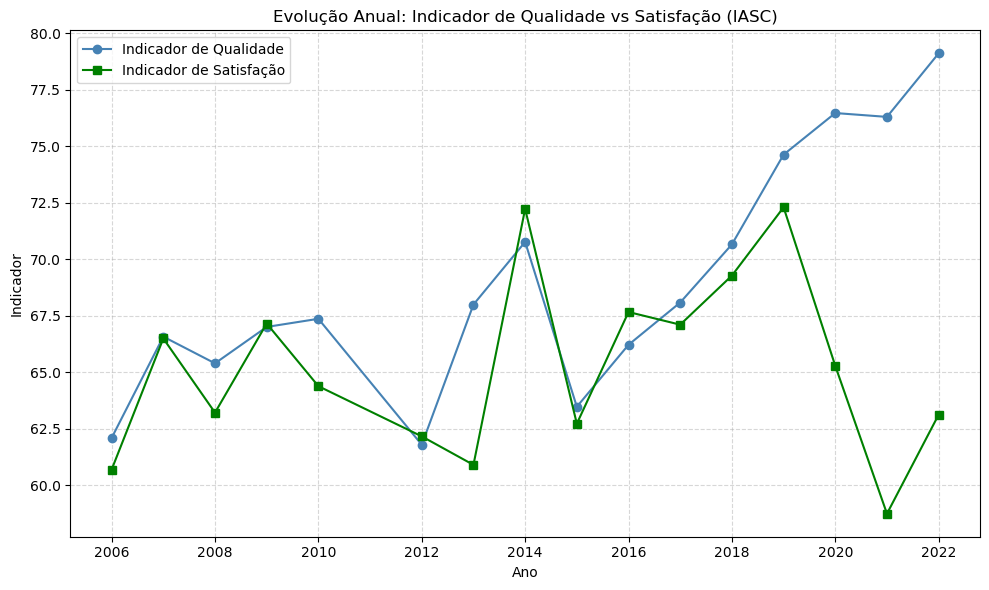

Gráfico 'qualidade_vs_satisfacao_linha.png' salvo com sucesso.


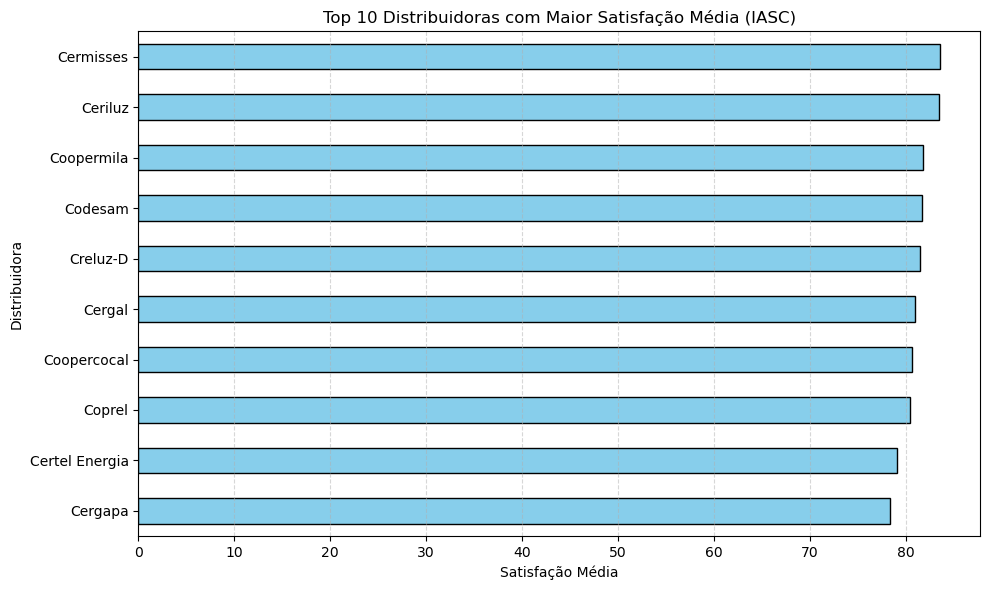

Gráfico 'top_10_distribuidoras_satisfacao.png' salvo com sucesso.


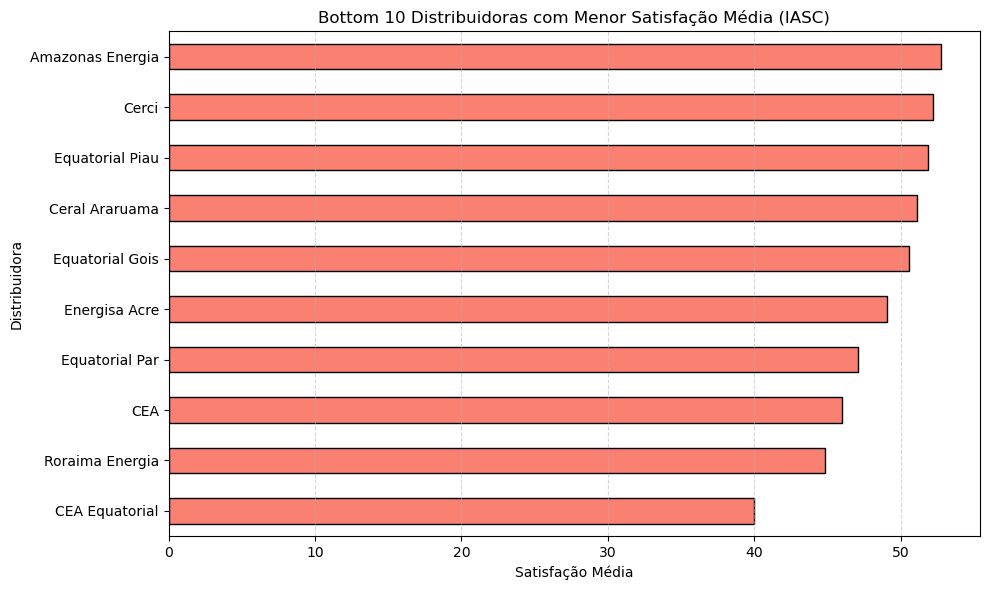

Gráfico 'bottom_10_distribuidoras_satisfacao.png' salvo com sucesso.


In [14]:
# %% [markdown]
# # Análise IASC - ANEEL
# Preparação dos dados e geração dos gráficos para análise de satisfação no setor elétrico.

# %% Importações
import pandas as pd
import matplotlib.pyplot as plt
import os

# %% Garantir criação da pasta 'imagens' antes de salvar gráficos
caminho_imagens = 'imagens'
os.makedirs(caminho_imagens, exist_ok=True)

# %% Carregar CSV
df = pd.read_csv(r'G:\10 - Projetos\14 - Analises de Dados\01 - Setor eletrico\analise_iasc\dados\indice-aneel-satisfacao-consumidor.csv')


# %% Selecionar e renomear colunas relevantes
df = df[["NumAno", "SigAgente", "MdaIndicadorQualidade", "MdaIndicadorSatisfacao"]].copy()
df.columns = ["Ano", "Distribuidora", "Indicador_Qualidade", "Indicador_Satisfacao"]

# %% Conversão de strings com vírgula para float
df["Indicador_Qualidade"] = df["Indicador_Qualidade"].str.replace(",", ".", regex=False).astype(float).round(2)
df["Indicador_Satisfacao"] = df["Indicador_Satisfacao"].str.replace(",", ".", regex=False).astype(float).round(2)

# %% Agrupamentos para médias anuais
media_ano_qualidade = df.groupby('Ano')['Indicador_Qualidade'].mean().round(2)
media_ano_satisfacao = df.groupby('Ano')['Indicador_Satisfacao'].mean().round(2)

# %% Conferência inicial
print(df.head())
print(media_ano_qualidade)
print(media_ano_satisfacao)

# %% Gráfico: Média de Qualidade por Ano
media_ano_qualidade.plot(kind='line', title='Média de Qualidade por Ano', marker='o', color='steelblue')
plt.ylabel('Indicador de Qualidade')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(caminho_imagens, 'media_ano_qualidade.png'), dpi=300)
plt.show()

# %% Gráfico: Média de Satisfação por Ano
media_ano_satisfacao.plot(kind='line', title='Média de Satisfação por Ano', marker='s', color='green')
plt.ylabel('Indicador de Satisfação')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(caminho_imagens, 'media_ano_satisfacao.png'), dpi=300)
plt.show()

# %% Gráfico de linhas - Qualidade vs Satisfação por Ano
plt.figure(figsize=(10,6))

plt.plot(
    media_ano_qualidade.index,
    media_ano_qualidade.values,
    marker='o',
    label='Indicador de Qualidade',
    color='steelblue'
)

plt.plot(
    media_ano_satisfacao.index,
    media_ano_satisfacao.values,
    marker='s',
    label='Indicador de Satisfação',
    color='green'
)

plt.title('Evolução Anual: Indicador de Qualidade vs Satisfação (IASC)')
plt.xlabel('Ano')
plt.ylabel('Indicador')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(caminho_imagens, 'qualidade_vs_satisfacao_linha.png'), dpi=300)
plt.show()

print("Gráfico 'qualidade_vs_satisfacao_linha.png' salvo com sucesso.")

# %% Gráfico TOP 10 Distribuidoras por Satisfação
top_10_satisfacao = (
    df.groupby("Distribuidora")["Indicador_Satisfacao"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .round(2)
)

plt.figure(figsize=(10,6))
top_10_satisfacao.sort_values().plot(
    kind='barh',
    color='skyblue',
    edgecolor='black'
)

plt.title('Top 10 Distribuidoras com Maior Satisfação Média (IASC)')
plt.xlabel('Satisfação Média')
plt.ylabel('Distribuidora')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(caminho_imagens, 'top_10_distribuidoras_satisfacao.png'), dpi=300)
plt.show()

print("Gráfico 'top_10_distribuidoras_satisfacao.png' salvo com sucesso.")

# %% Gráfico BOTTOM 10 Distribuidoras por Satisfação
bottom_10_satisfacao = (
    df.groupby("Distribuidora")["Indicador_Satisfacao"]
    .mean()
    .sort_values(ascending=True)
    .head(10)
    .round(2)
)

plt.figure(figsize=(10,6))
bottom_10_satisfacao.sort_values().plot(
    kind='barh',
    color='salmon',
    edgecolor='black'
)

plt.title('Bottom 10 Distribuidoras com Menor Satisfação Média (IASC)')
plt.xlabel('Satisfação Média')
plt.ylabel('Distribuidora')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(caminho_imagens, 'bottom_10_distribuidoras_satisfacao.png'), dpi=300)
plt.show()

print("Gráfico 'bottom_10_distribuidoras_satisfacao.png' salvo com sucesso.")